In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Normal Distribution

Let's consider another distribution with real data.

Below we load in the classic Galton Height dataset[^***]. This dataset was collected from families and contains heights of the father, mother, and children. We will focus on the father heights, and plot the distribution of heights in a histogram.

In [4]:
galton_df = pd.read_csv("../../data/height.csv")
galton_df.head(6)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
5,2,75.5,66.5,73.66,4,2,male,72.5


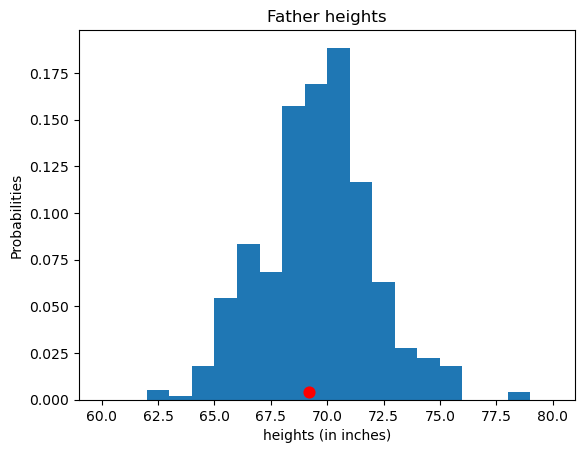

In [5]:
bin_size=np.arange(60, 80.5, 1)
plt.hist(galton_df["father"], bins = bin_size, density = True)
plt.title('Father heights')
plt.xlabel('heights (in inches)')
plt.ylabel('Probabilities')
plt.scatter(galton_df['father'].mean(), 0.004, color='red', s=60);
plt.show()

This data approximates a distribution, but a special one!
We can see this distribution is bell-shaped, continuous, symmetric and approximates a **normal distribution**.

## Normal Probability Distribution

Arguably one of the most important continuous distributions, the normal distribution is a common distribution that tends to model heights, weights, SAT scores - to name a few.

This distribution is symmetric and bell-shaped, giving it the nickname "bell-curve". The three measures of center: mode, median, and mean, are exactly the same for the normal distribution. Further, the distribution itself is defined entirely in terms of its mean and standard deviation. Notationally, given a random variable $X$ that is normally distributed, we can say $X \sim N(\mu,\sigma)$, where $\mu$ and $\sigma$ are the mean and standard deviation of the distribution, respectively.

Below, we can plot a normal distribution with the `scipy` library function `stats.norm()`:

```python
stats.norm(loc, scale)
```
where the arguments `loc` and `scale` correspond to the mean and standard deviation of the normal distribution, respectively. 

To get the corresponding $y$ values, we call the PDF method (`pdf()`) on a given array of x-values:
```python
stats.norm(loc, scale).pdf(x)
```

In our visualization, we also depict the mean in red. 

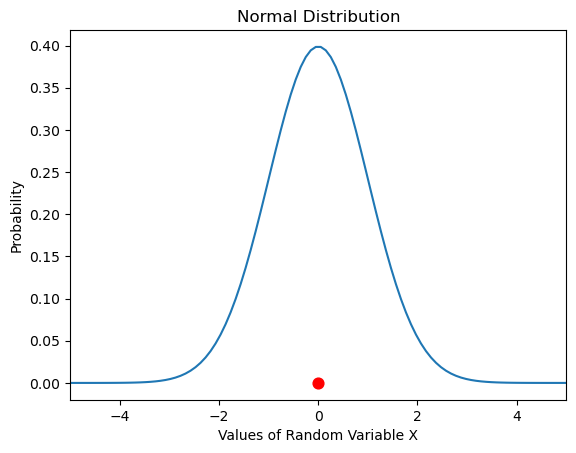

In [8]:
from scipy import stats

# initialize a normal distribution with mean 0 and standard deviation of 1
snd = stats.norm(loc = 0, scale = 1)

#generates 100 values from -5 to 5, equally spaced
x = np.linspace(-5, 5, 100)

plt.plot(x, snd.pdf(x))
plt.scatter(0, 0, color='red', s=60);

plt.xlim(-5, 5)
plt.title('Normal Distribution')
plt.xlabel('Values of Random Variable X')
plt.ylabel('Probability')
plt.show()

While there is not an easy formula to compute probabilities by hand, the normal curve itself can be written as a function 
>$f(x)=\frac{1}{\sigma \sqrt{2\pi}}e^{\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}\right)}$

where probabilities of interest are calculated by finding the area under the curve.


## Standard Deviation and the Normal Distribution

Remember how we said standard deviation was a good measure of spread? One reason is because it can be used to bound the data. In particular, a majority of the data that is normally distributed falls within one standard deviation of the mean: about $68.27\%$ of the data! About $95.45\%$ of the data falls within two standard deviations, and roughly $99.73\%$ falls within three standard deviations.

![](normal_std_plot.png)

The special case of the normal distribution is called the **standard normal distribution** and occurs when $\mu = 0$ and $\sigma = 1$.
Given a random variable and any values for $\mu$ and $\sigma$, that is $X  ∼  N(\mu, \sigma)$, we can *transform* to a standard normal, by normalizing it! That is:

$$\frac{X-\mu}{\sigma}$$

Note this may be useful if you are comparing values from multiple normal distributions.

## Central Limit Theorem

Recall the rolling of the die example from [the previous section](../2/uniform.ipynb). Now, suppose I am not interested in each roll but in the average value of all the dice rolls of students in my classroom. I have 50 students present and each student rolls 1 die. I then take the mean of all 50 dice rolls. What is the probability distribution for the average dice roll? This is another question that can be easily answered through simulation!

Simulations use a computer to mimic real experiments. Returning to our dice-rolling example from the [the previous section](../2/uniform.ipynb), instead of asking all of my students to roll dice and take the mean 100s or 1000s of times to plot an empirical distribution (which would be both cumbersome and time consuming), I can have the computer do it for us. First, we can write code that does this experiment one time. We use `sample()` to roll our die and `np.mean()` to take the average.

In [16]:
die = pd.DataFrame(
    {
        'Face': np.arange(1, 7),
    }
)
np.mean(die.sample(50, replace=True))

3.68

The next step is to write a function that can repeat the experiment a certain number of times. We can do this using a `for loop` and saving the results of each experiment in a `numpy` array.

In [31]:
def face_mean_sim(nsim):
    """Simulates nsim repetitions of 50 dice rolls and returns their sample mean."""
    np.random.seed(1234)
    means = []
    for i in range(nsim):
        means.append(np.mean(die.sample(50, replace=True)))
    return np.array(means)

Our new function `face_mean_sim()` will simulate the rolling of 50 die the number of times specified by `nsim`.

If we repeat the experiment 10 times we get an idea of what the means look like. In particular, we find that 3 of these 10 experiments have a mean of around 3.45, while all experiments have a mean in the range 3.22 to 3.76.

In [33]:
ten_runs = face_mean_sim(10)
ten_runs

array([3.42, 3.5 , 3.24, 3.44, 3.22, 3.6 , 3.08, 3.76, 3.66, 3.46])

Plotting a histogram we see the empirical distribution of these 10 experiments. 

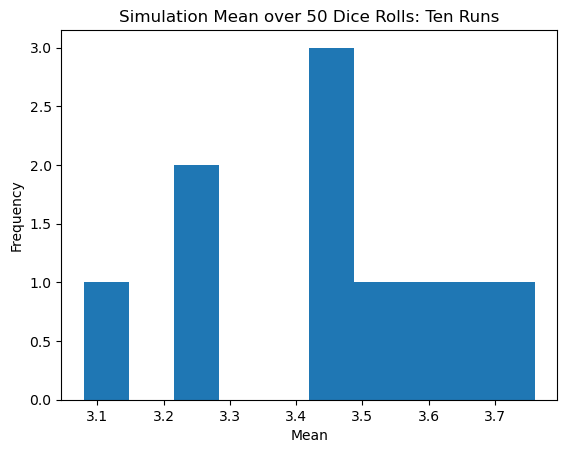

In [35]:
plt.hist(ten_runs);
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Simulation Mean over 50 Dice Rolls: Ten Runs')
plt.show()

It is difficult to determine what this distribution looks like with only 10 runs, so we experiment by plotting the empirical distributions of results from 100, 1000, and 10000 replications of the dice rolling experiment.

In [ ]:
fig, axs = plt.subplots(3, figsize=(8, 8))
fig.suptitle('Simulation Mean over 50 Dice Rolls: 100, 1000, and 10000 Runs', fontsize=16)
fig.tight_layout()
axs[0].hist(face_mean_sim(100), 30);
axs[1].hist(face_mean_sim(1_000), 30);
axs[2].hist(face_mean_sim(10_000),30);

As we saw with our Uniform Distribution experiment, with larger numbers of experiments/samples our empirical distribution approaches the true probability distribution.

Based on our empirical distribution with 10,000 experiments, we can see that the average value of the dice rolls is symmetric and approximately bell-shaped with a mean of around 3.5. In fact, these properties of being approximately bell-shaped and symmetric are characteristic of the empirical *normal distribution*.

As we are plotting the distribution means of samples from a uniform distribution, the resulting probability distribution will always take on this shape, that is it will always be approximately normal, as long as the sample size is sufficiently large. This is due to an important mathematical theorem, the **Central Limit Theorem**[^***]. 

The Central Limit Theorem (CLT) states that if you take sufficiently large random samples from a population with replacement, the distribution of sample means will be approximately normally distributed. The CLT is a property of sample means and holds true for samples from any distribution *you may come across*, not just the uniform distribution of dice rolls. For example, the distribution of average heights, average weights, and average test scores of data science students would all be approximately normally distributed as long as we take large enough random samples from our population with replacement.

In the [the previous section](../2/uniform.ipynb) we calculated the mean and standard deviation of the uniform distribution of our dice rolls. The CLT allows us to use these to estimate the mean (μ) and standard deviation (σ) of our distribution of sample means. According to the Central Limit Theorem, if the mean and standard deviation of the population you are sampling from are $\mu$ and $\sigma$ respectively, then the mean and standard deviation of the distribution of sample means are $\mu$ and $\frac{σ}{\sqrt{n}}$ respectively, where n is the sample size.

Therefore, since we know from earlier that the mean of the uniform dice rolling distribution is 3.5 and the standard deviation is 1.71, the mean of the distribution of sample means is also 3.5 and the standard deviation is $\frac{1.71}{\sqrt{50}} = 0.24$. 

Let's evaluate this further using our empirical distribution.

In [ ]:
np.mean(face_mean_sim(10_000))

In [ ]:
np.std(face_mean_sim(10_000))

Our empirical distribution matches what we expected to see mathematically according to the Central Limit Theorem!

[^***]: For more information on the Galton Height Dataset, see the following article: Galton, Francis Sir. “Regression Towards Mediocrity in Hereditary Stature.” The Journal of the Anthropological Institute of Great Britain and Ireland 15: 246.

[^***]: For more information on the Central Limit Theorem, see the online Statistics Textbook at [OpenStax](https://cnx.org/contents/MBiUQmmY@25.39:MVbL0vFO@10/Introduction)